#### import data

In [1]:
getwd()

[1] "/Users/Lotus/Desktop/stevens/job/mobile app store"

In [3]:
AppleStore <- read.csv('AppleStore.csv',na.strings = c(''))
# check the na data
AppleStore[!complete.cases(AppleStore),]

X,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
<int>,<int>,<chr>,<dbl>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>


#### data preparation

In [6]:
head(AppleStore)

,X,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
,<int>,<int>,<chr>,<dbl>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
2,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
3,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
4,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shopping",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
5,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
6,6,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1


In [7]:
str(AppleStore)

'data.frame':	7197 obs. of  17 variables:
 $ X               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ id              : int  281656475 281796108 281940292 282614216 282935706 283619399 283646709 284035177 284666222 284736660 ...
 $ track_name      : chr  "PAC-MAN Premium" "Evernote - stay organized" "WeatherBug - Local Weather, Radar, Maps, Alerts" "eBay: Best App to Buy, Sell, Save! Online Shopping" ...
 $ size_bytes      : num  1.01e+08 1.59e+08 1.01e+08 1.29e+08 9.28e+07 ...
 $ currency        : chr  "USD" "USD" "USD" "USD" ...
 $ price           : num  3.99 0 0 0 0 0.99 0 0 9.99 3.99 ...
 $ rating_count_tot: int  21292 161065 188583 262241 985920 8253 119487 1126879 1117 7885 ...
 $ rating_count_ver: int  26 26 2822 649 5320 5516 879 3594 4 40 ...
 $ user_rating     : num  4 4 3.5 4 4.5 4 4 4 4.5 4 ...
 $ user_rating_ver : num  4.5 3.5 4.5 4.5 5 4 4.5 4.5 5 4 ...
 $ ver             : chr  "6.3.5" "8.2.2" "5.0.0" "5.10.0" ...
 $ cont_rating     : chr  "4+" "4+" "4+" "12+" ...
 $ prime_gen

In [8]:
#chr convert to factor
AppleStore$currency <- factor(AppleStore$currency)
AppleStore$prime_genre <- factor(AppleStore$prime_genre)
AppleStore$cont_rating <- factor(AppleStore$cont_rating)
AppleStore$vpp_lic <- factor(AppleStore$vpp_lic)
summary(AppleStore)

       X               id             track_name          size_bytes       
 Min.   :    1   Min.   :2.817e+08   Length:7197        Min.   :5.898e+05  
 1st Qu.: 2090   1st Qu.:6.001e+08   Class :character   1st Qu.:4.692e+07  
 Median : 4380   Median :9.781e+08   Mode  :character   Median :9.715e+07  
 Mean   : 4759   Mean   :8.631e+08                      Mean   :1.991e+08  
 3rd Qu.: 7223   3rd Qu.:1.082e+09                      3rd Qu.:1.819e+08  
 Max.   :11097   Max.   :1.188e+09                      Max.   :4.026e+09  
                                                                           
 currency       price         rating_count_tot  rating_count_ver  
 USD:7197   Min.   :  0.000   Min.   :      0   Min.   :     0.0  
            1st Qu.:  0.000   1st Qu.:     28   1st Qu.:     1.0  
            Median :  0.000   Median :    300   Median :    23.0  
            Mean   :  1.726   Mean   :  12893   Mean   :   460.4  
            3rd Qu.:  1.990   3rd Qu.:   2793   3rd Qu.: 

In [9]:
#check price outliers
Poutliers <- AppleStore[AppleStore$price > 50,]
Poutliers

,X,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
,<int>,<int>,<chr>,<dbl>,<fct>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<int>,<int>,<int>,<fct>
116,129,308368164,Proloquo2Go - Symbol-based AAC,723764224,USD,249.99,773,10,4.0,3.5,5.0.1,4+,Education,37,5,3,1
163,184,320279293,NAVIGON Europe,144412672,USD,74.99,927,3,3.5,2.5,2.17,4+,Navigation,37,2,21,1
1137,1324,491998279,Articulation Station Pro,425919488,USD,59.99,294,130,4.5,5.0,2.2.3,4+,Education,38,5,1,1
1480,1714,551215116,LAMP Words For Life,583263232,USD,299.99,41,0,4.0,0.0,1.5.5,4+,Education,24,5,1,1
2182,2541,700440156,Articulation Test Center Pro,174737408,USD,59.99,29,0,4.5,0.0,2.6,4+,Education,24,5,1,1
2569,3043,849732663,KNFB Reader,106429440,USD,99.99,71,0,4.5,0.0,2.7.3,4+,Productivity,37,5,14,1
3239,3899,946930094,FineScanner Pro - PDF Document Scanner App + OCR,63974400,USD,59.99,100,4,4.0,4.5,6.2.5,4+,Business,37,5,12,1


#### data visualization

In [28]:
library(ggplot2)
library(grid)

##### price distribution of paid apps

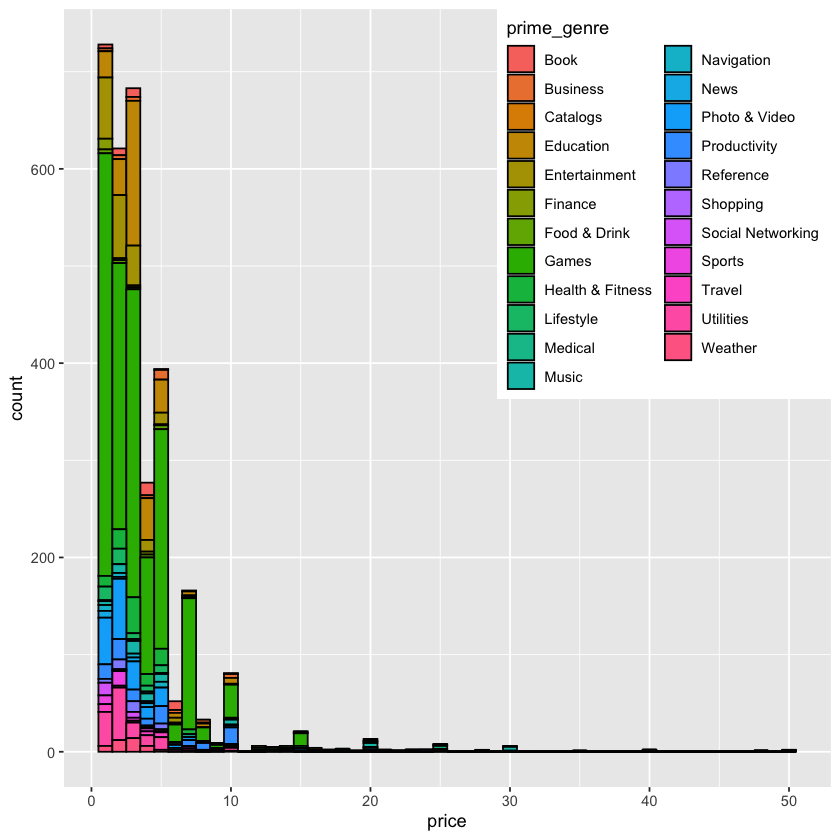

In [15]:
#visualize price distribution of paid apps
paidapp <- AppleStore[!AppleStore$price==0,]
paidapp <- paidapp[!paidapp$price>50,] #without outliers

p <- ggplot(data = paidapp,aes(x=price,fill=prime_genre))
p+geom_histogram(binwidth = 1,colour='black')+
  theme(legend.position=c(1,1),legend.justification=c(1,1))

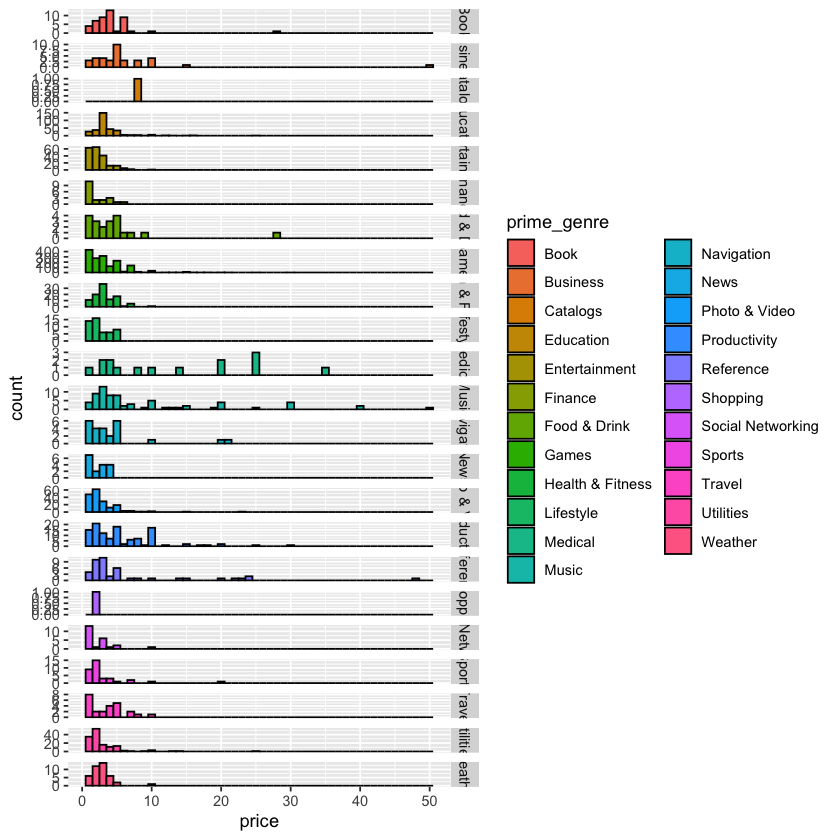

In [16]:
#price distribution get affected by category
v <- ggplot(data=paidapp,aes(x=price))
v+geom_histogram(binwidth = 1,aes(fill=prime_genre),colour='black') +
  facet_grid(prime_genre~.,scale='free')

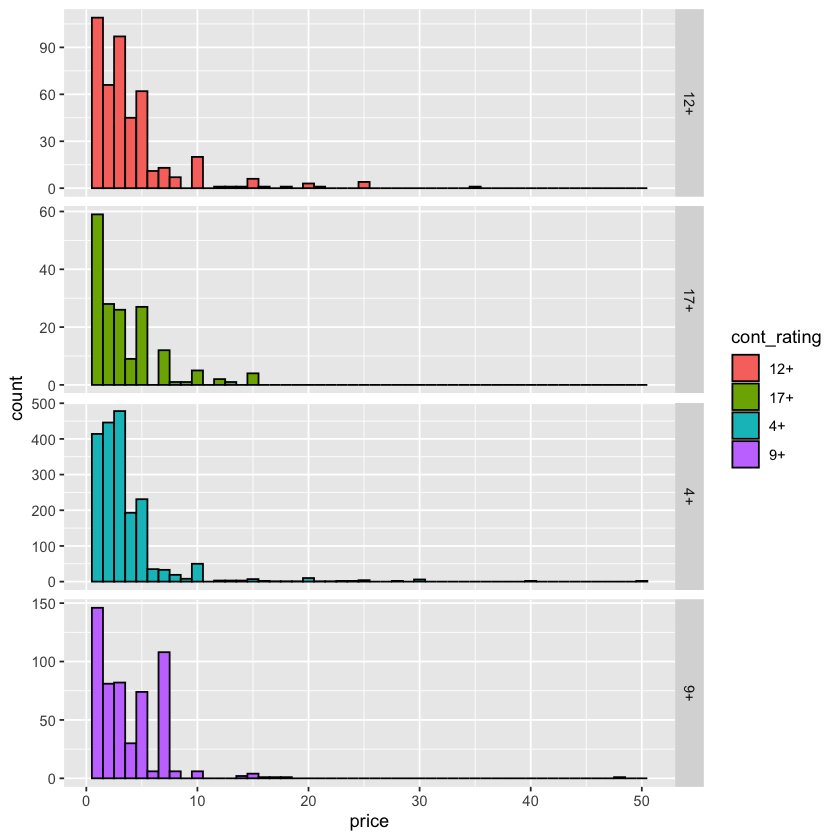

In [19]:
#price distribution get affected by content rating
v+geom_histogram(binwidth = 1,aes(fill=cont_rating),colour='black') +
  facet_grid(cont_rating~.,scale='free')

#### ratings

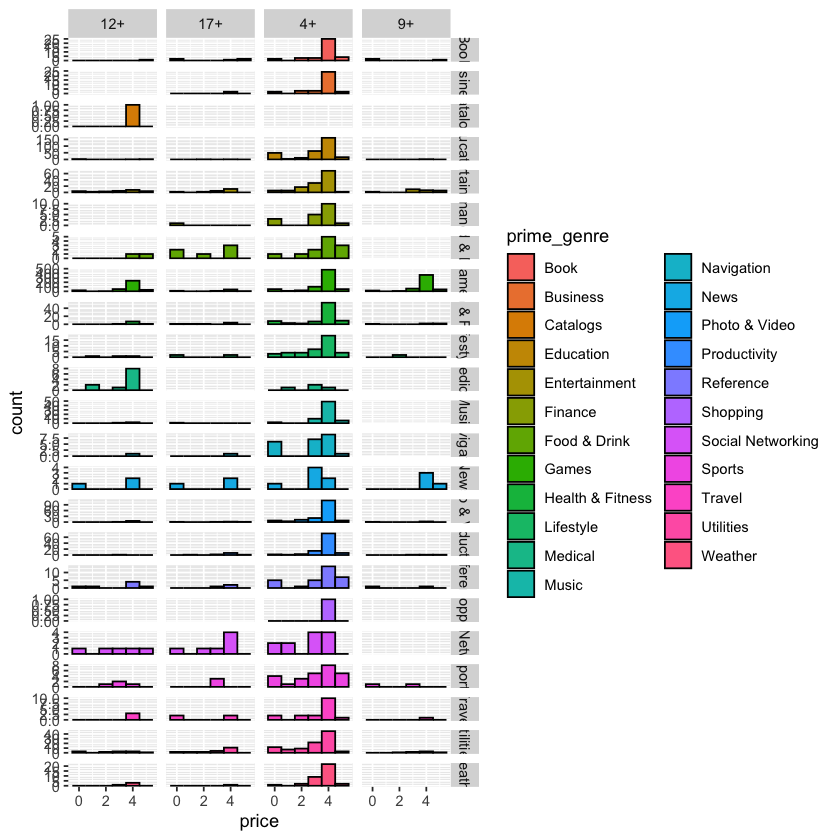

In [48]:
# ratings affected by content rating and genre
v+geom_histogram(binwidth = 1,aes(x=user_rating,fill=prime_genre),colour='black') +
  facet_grid(prime_genre~cont_rating,scale='free')

In [21]:
#adding paid or not column
AppleStore[AppleStore$price>0,'PaidOrNot'] <- 'paid'
AppleStore[AppleStore$price==0,'PaidOrNot'] <- 'unpaid'
AppleStore$PaidOrNot = factor(AppleStore$PaidOrNot)
head(AppleStore)

,X,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,PaidOrNot
,<int>,<int>,<chr>,<dbl>,<fct>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
1,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,paid
2,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,unpaid
3,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,unpaid
4,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shopping",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,unpaid
5,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,unpaid
6,6,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1,paid


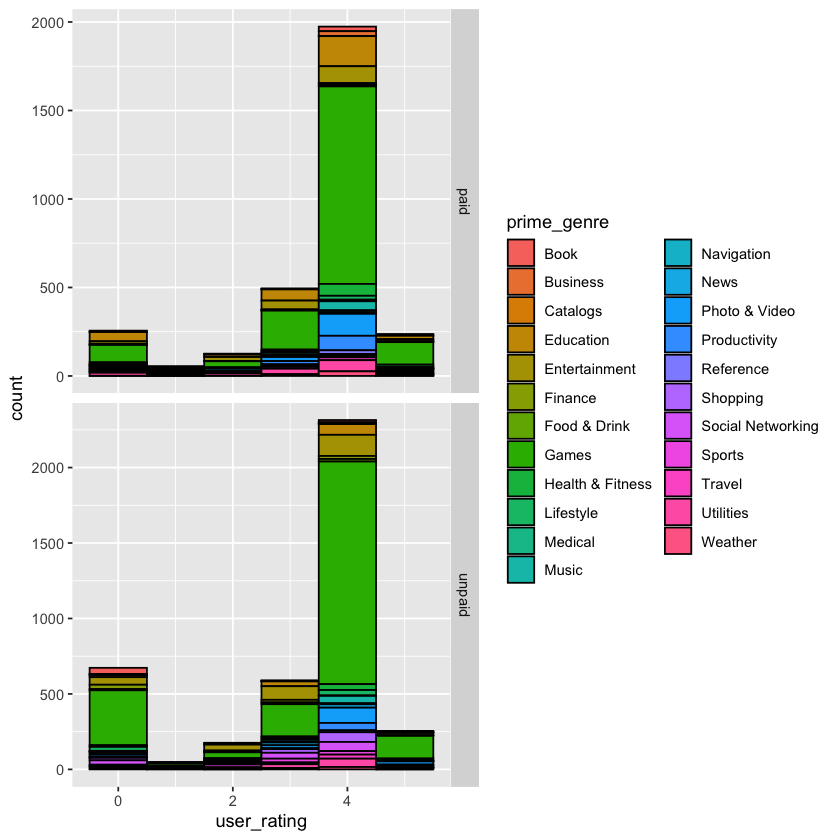

In [46]:
#ratings affected by paid and free
a <- ggplot(data=AppleStore)
a+geom_histogram(binwidth = 1,aes(x=user_rating,fill=prime_genre),colour='black') +
  facet_grid(PaidOrNot~.,scale='free')

#### price and ratings

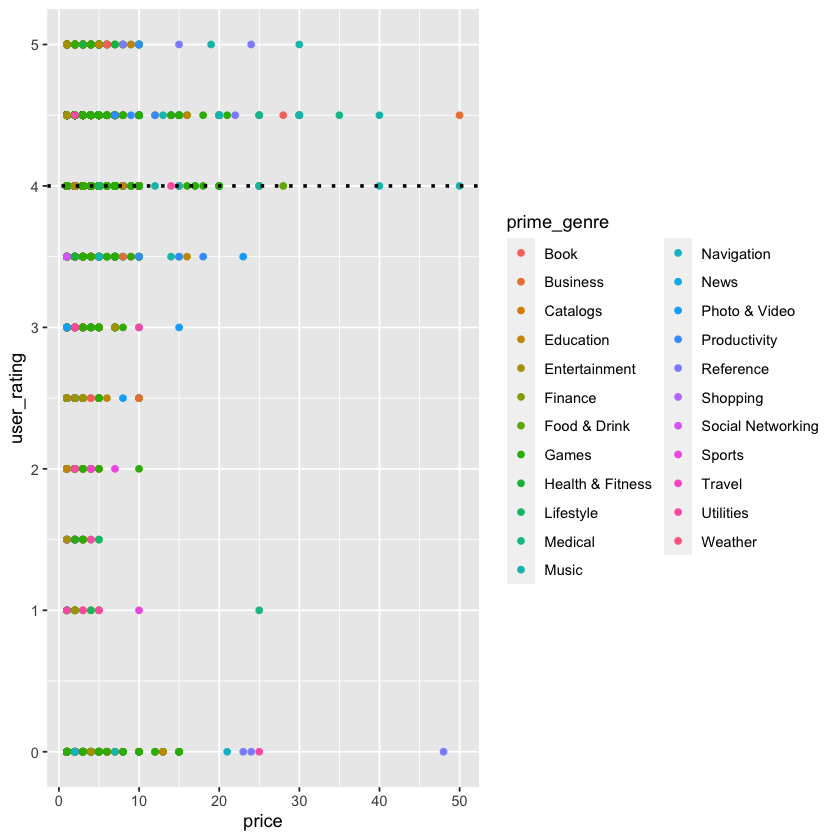

In [25]:
#price and ratings let 4.0 as the line of satisfied rating
pr <- ggplot(data=paidapp,aes(x=price,y=user_rating,colour=prime_genre))
pr+geom_point()+geom_hline(yintercept = 4.0,colour='black',size = 1,linetype=3)

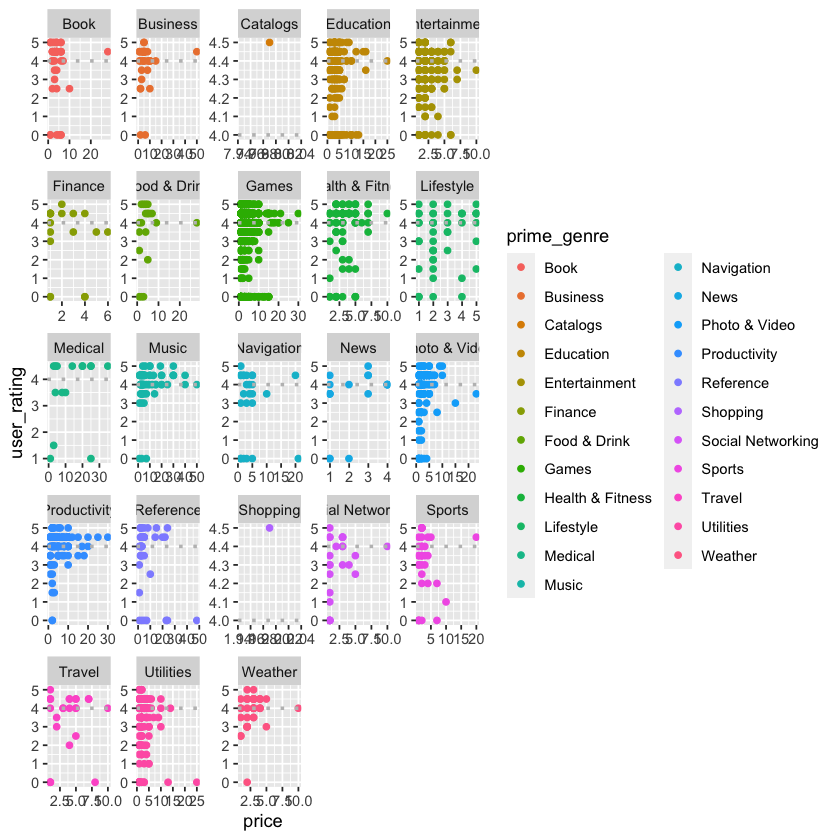

In [43]:
pr+geom_point()+facet_wrap(.~prime_genre,scale='free')+ # facet genre
  geom_hline(yintercept = 4.0,colour='Grey',size = 1,linetype=3)

#### app size and price

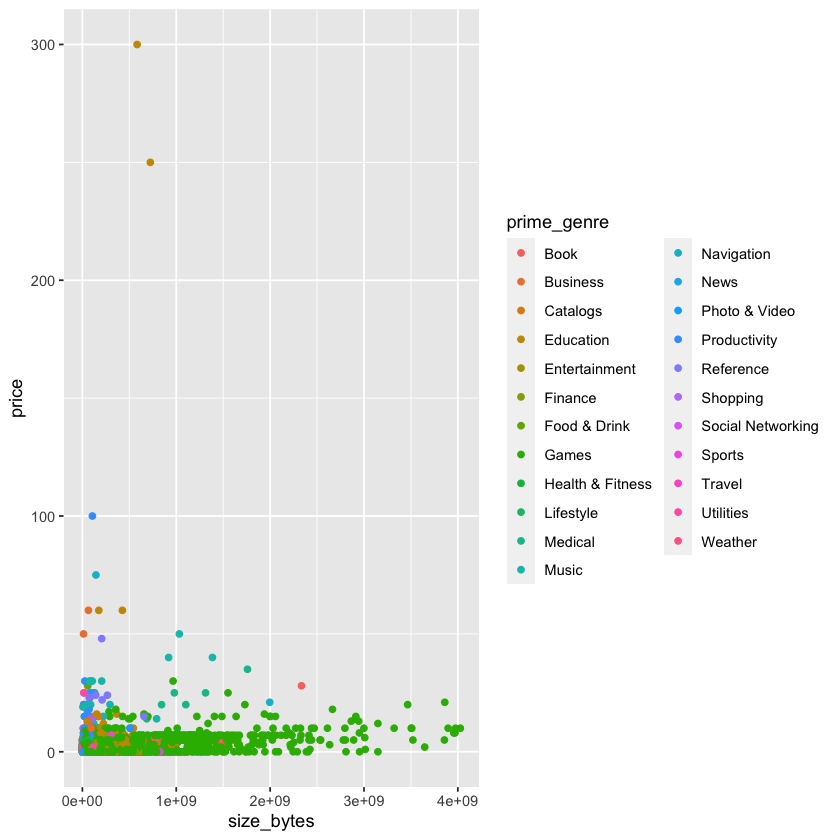

In [30]:
#size and price
sp <- ggplot(data=AppleStore,aes(x=size_bytes,y=price,colour=prime_genre))
sp + geom_point()

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



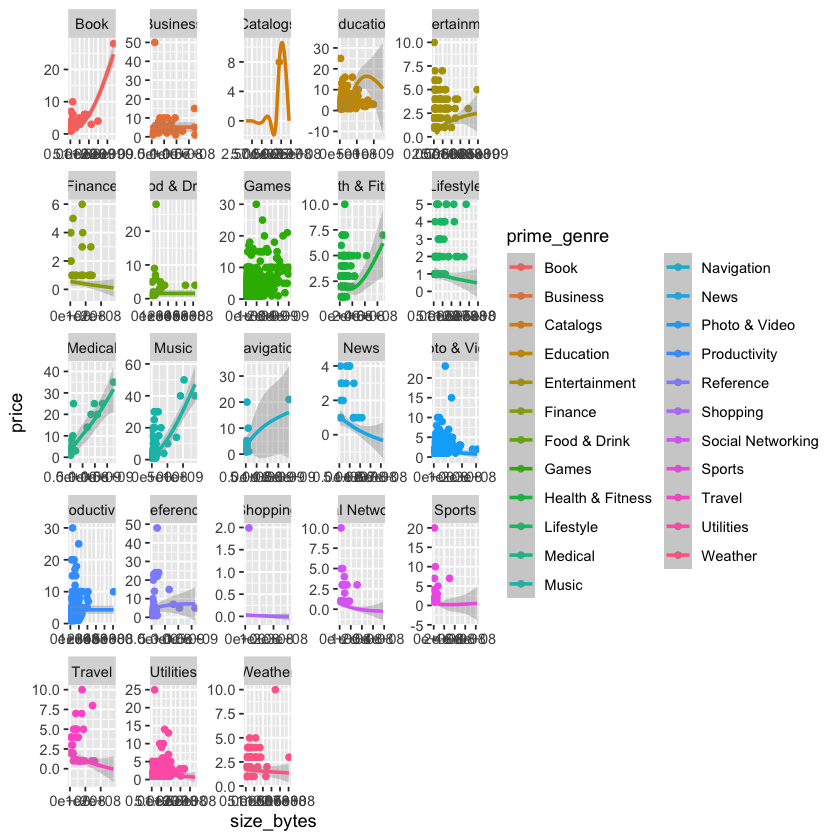

In [44]:
#group by genre
sp + geom_point(data=paidapp)+geom_smooth()+facet_wrap(.~prime_genre,scale='free')

##### devices numbers and languages numbers

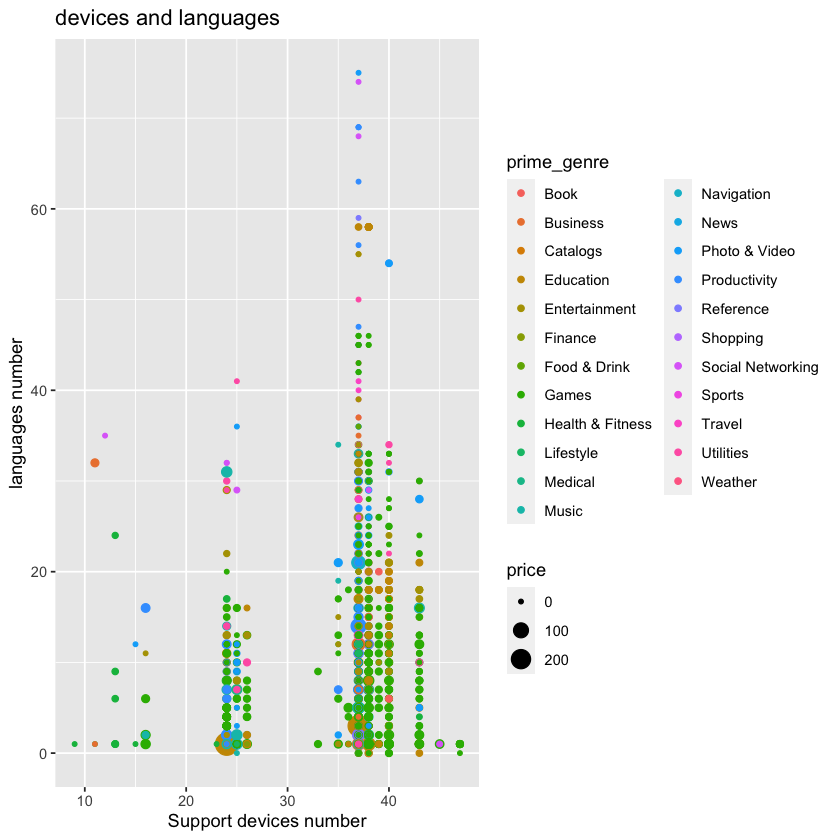

In [18]:
#devices and languages
q<-ggplot(data = AppleStore, aes(x=sup_devices.num,y=lang.num,colour=prime_genre,size=price))
q+geom_point()+xlab('Support devices number')+ylab('languages number')+
  ggtitle('devices and languages')